In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
#Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/250.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)

170500096/170498071 [==============================] - 3s 0us/step
x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [3]:
x_train[0][0][0].shape

(3,)

In [4]:
x_train[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [5]:
#number of classes
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [0]:
#Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), activation='relu', padding='same') (i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)
x = Conv2D(64,(3,3), activation='relu', padding='same') (x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), activation='relu', padding='same') (x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), activation='relu', padding='same') (x)
x= BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same') (x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)

#x = GlobalMaxPooling2D()(x)
x = Flatten() (x)
x= Dropout(0.2)(x)
x = Dense(1024, activation ='relu')(x)
x=Dropout(0.2) (x)
x = Dense(K, activation ='softmax') (x)

model = Model(i,x)

In [0]:
#Compile and fit
#Note: make sure you are using GPU for this
model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
#Fit with data augmentation
#Note: If you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size


In [9]:
r = model.fit(train_generator, validation_data=(x_test,y_test), steps_per_epoch= steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 27s 17ms/step - loss: 1.4126 - accuracy: 0.5073 - val_loss: 1.1486 - val_accuracy: 0.6085
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.9805 - accuracy: 0.6592 - val_loss: 1.0225 - val_accuracy: 0.6550
Epoch 3/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.8416 - accuracy: 0.7098 - val_loss: 0.9079 - val_accuracy: 0.6972
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.7490 - accuracy: 0.7430 - val_loss: 0.7377 - val_accuracy: 0.7483
Epoch 5/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.6806 - accuracy: 0.7704 - val_loss: 0.7024 - val_accuracy: 0.7650
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6289 - accuracy: 0.7867 - val_loss: 0.6385 - val_accuracy: 0.7892
Epoch 7/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5878 - accuracy: 0.8008 - val_loss: 0.5823 -

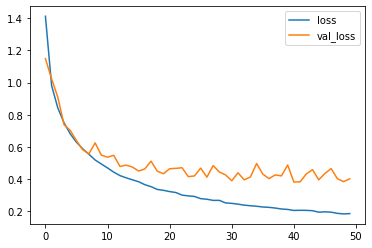

In [10]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

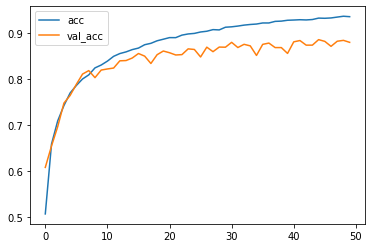

In [11]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[939   1  17   9   2   0   5   7  17   3]
 [ 12 965   1   2   0   0   2   0   6  12]
 [ 44   0 814  37  25  15  34  23   3   5]
 [ 15   0  33 798  21  38  47  36   7   5]
 [  9   1  17  28 851   8  33  52   1   0]
 [  9   1  21 131  29 729  18  60   1   1]
 [  8   0  16  28   6   1 934   5   1   1]
 [  6   0   9  10  12   7   1 954   0   1]
 [ 35   5   2   4   1   2   3   4 934  10]
 [ 26  62   0   1   2   1   7   4  10 887]]


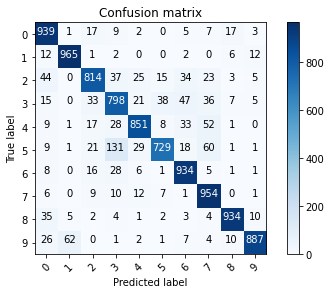

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
#label mapping
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

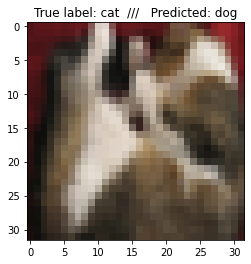

In [14]:
#SHow me misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s  ///   Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));

In [15]:
#Now that model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 